Setting Up Environment

In [1]:
import nltk
import pandas as pd
import re
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/81b211c5-4d1a-434f-99b7-
[nltk_data]     15559ab064ae/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [86]:
# Load data
df_posts = pd.read_csv('cleaned_reddit_posts.csv')
df_comments = pd.read_csv('cleaned_reddit_comments.csv')

Sentiment Scoring and Labeling

In [3]:
# Initialize analyzer
sia = SentimentIntensityAnalyzer()

In [89]:
# apply sentiment scoring and create column 'sentiment'
df_posts['sentiment'] = df_posts['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_comments['sentiment'] = df_comments['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [90]:
# label sentiment and create column 'sentiment label'
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_posts['sentiment_label'] = df_posts['sentiment'].apply(label_sentiment)
df_comments['sentiment_label'] = df_comments['sentiment'].apply(label_sentiment)

In [ ]:
# save sentiment for further analysis
df_posts.to_csv('sentiment_reddit_posts.csv', index=False)
df_comments.to_csv('sentiment_reddit_comments.csv', index=False)

Sentiment Over Time

In [2]:
# load sentiment data
df_posts = pd.read_csv('sentiment_reddit_posts.csv')
df_comments = pd.read_csv('sentiment_reddit_comments.csv')

In [19]:
# group average sentiment by month 
# posts
df_posts['date'] = pd.to_datetime(df_posts['date'])
df_posts['month'] = df_posts['date'].dt.to_period('M')
monthly_sentiment_posts = df_posts.groupby('Month')['sentiment'].mean()

# comments
df_comments['date'] = pd.to_datetime(df_comments['date'])
df_comments['month'] = df_comments['date'].dt.to_period('M')
monthly_sentiment_comments = df_comments.groupby('Month')['sentiment'].mean()

In [6]:
# view monthly sentiment of posts
display(monthly_sentiment_posts)

Month
2019-11-01    0.185964
2019-12-01    0.035667
2020-02-01    0.365286
2020-03-01   -0.172250
2020-04-01   -0.458800
2020-05-01   -0.109533
2020-07-01    0.233525
2020-12-01   -0.999900
2021-01-01    0.790700
2021-03-01    0.124275
2021-06-01   -0.949000
2021-07-01   -0.323558
2021-08-01   -0.875000
2021-09-01   -0.409800
2021-10-01   -0.200950
2021-11-01   -0.417367
2022-02-01   -0.999700
2022-04-01   -0.187643
2022-05-01   -0.667900
2022-06-01   -0.995400
2022-09-01    0.993200
2022-10-01   -0.246569
2023-01-01   -0.273200
2023-04-01    0.190480
2023-05-01   -0.202300
2023-06-01   -0.683117
2023-07-01   -0.326233
2023-11-01    0.000000
2024-05-01   -0.849300
2024-07-01    0.064300
2024-08-01   -0.951300
2024-09-01   -0.546100
Name: sentiment, dtype: float64

In [8]:
# view monthly sentiment of comments
display(monthly_sentiment_comments)

Month
2019-11-01    0.064386
2019-12-01    0.071105
2020-01-01    0.297300
2020-02-01    0.204700
2020-03-01    0.012458
2020-05-01   -0.012714
2020-07-01    0.062253
2020-08-01   -0.396250
2020-11-01    0.039067
2020-12-01   -0.322919
2021-01-01    0.303550
2021-02-01   -0.533520
2021-03-01   -0.251288
2021-04-01   -0.838133
2021-05-01   -0.306996
2021-06-01   -0.291179
2021-07-01   -0.436766
2021-08-01   -0.396945
2021-09-01   -0.258118
2021-10-01   -0.288579
2021-11-01   -0.467853
2021-12-01   -0.451633
2022-01-01   -0.280539
2022-02-01   -0.679433
2022-04-01   -0.237092
2022-05-01   -0.179683
2022-06-01   -0.376639
2022-07-01   -0.222735
2022-08-01    0.015441
2022-09-01   -0.092557
2022-10-01   -0.348492
2022-11-01   -0.195600
2022-12-01   -0.201125
2023-01-01    0.016837
2023-02-01    0.154491
2023-03-01   -0.314320
2023-04-01   -0.240880
2023-05-01   -0.430469
2023-06-01   -0.413384
2023-07-01   -0.411375
2023-08-01   -0.509633
2023-09-01   -0.437050
2023-10-01   -0.204637
2023-

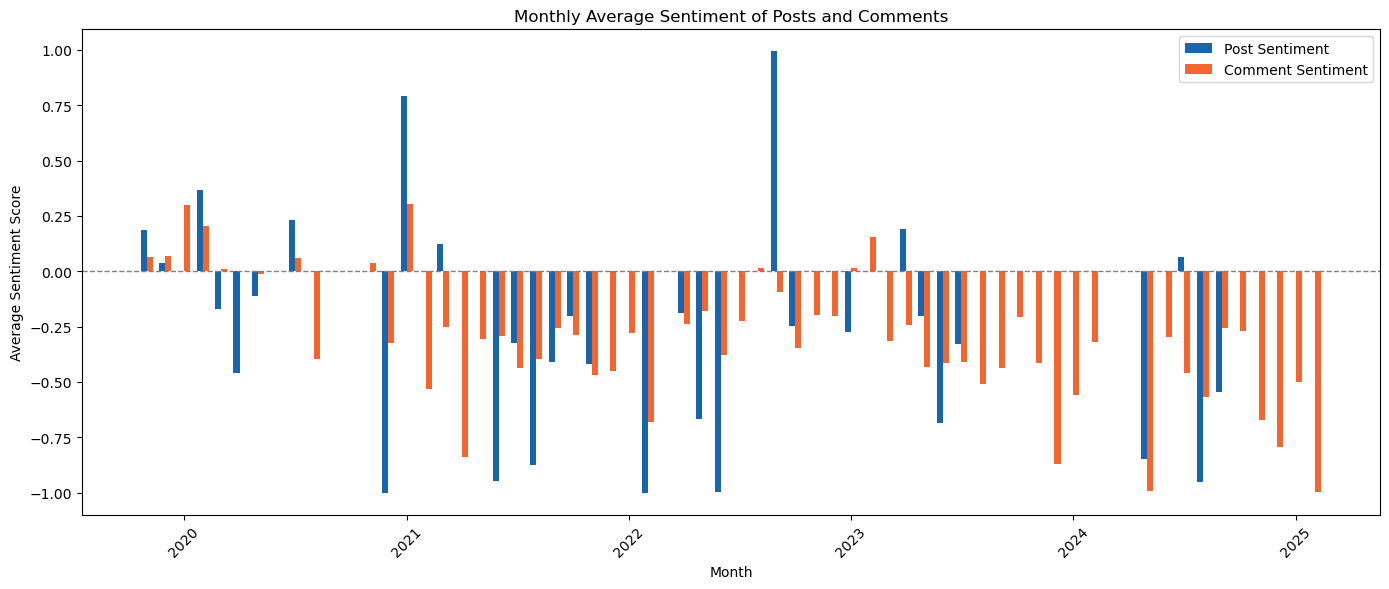

In [5]:
# Average Sentiment Over Time
plt.figure(figsize=(14, 6))

# convert index to datetime 
monthly_sentiment_posts.index = pd.to_datetime(monthly_sentiment_posts.index)
monthly_sentiment_comments.index = pd.to_datetime(monthly_sentiment_comments.index)

# plotting with offset to avoid overlap
bar_width = 10  # days
offset = pd.to_timedelta(bar_width / 2, unit='D')

plt.bar(monthly_sentiment_posts.index - offset,
        monthly_sentiment_posts.values,
        width=bar_width,
        label='Post Sentiment',
        color='#1865ab')

plt.bar(monthly_sentiment_comments.index + offset,
        monthly_sentiment_comments.values,
        width=bar_width,
        label='Comment Sentiment',
        color='#f46530')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Monthly Average Sentiment of Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# view january 2021 posts
pd.set_option('display.max_colwidth', None)
jan_post = df_posts[df_posts['month'] == '2021-01']
display(jan_post[['id', 'title', 'selftext', 'date', 'subreddit', 'score', 'num_comments', 'sentiment_label']])

,id,title,selftext,date,subreddit,score,num_comments,sentiment_label
100,l560ep,Granted writ,GOOD NEWS !!! My husbands WRIT OF certiorari GRANTED!!! @jettica65 @anicie3 @FreeRodneyReed @KarineOmry @KimKardashian @KianaTag #RubenGutierrez\n\nhttps://www.catholicnewsagency.com/news/supreme-court-rules-favorably-toward-inmate-requesting-priest-at-execution-16152?fbclid=IwAR31H2TjS6EU6myKTfgsl3fJrmG9Gx-_TUCFJghBfkEKvEAOvcifMmtqQ9g,2021-01-26 04:19:01,EndMassIncarceration,11,1,Positive
101,l52nee,Ash overusing AAVE?,"I like their coverage and most of their banter. Nothing is perfect and I do have my issues with the show but one small thing that's really been bugging me is that I feel like Ash uses way too much AAVE (i.e., ""okurrrr"", ""spill the tea"", ""sis"", etc), and oftentimes incorrectly. It just feels fake and gives me an icky feeling. I'm not gonna say it's full-on cultural appropriation, but it just feels.... inauthentic? \n\nLike, I'm not Black but I grew up with a Black stepdad in the zip code with the highest Black population south of LA in California. I don't even talk like how Ash talks. I grew up around White folks who also grew up in the hood and speak AAVE naturally, and Ash isn't it. I know that for a fact after that Rodney Reed episode when she asked if Black people preferred being called ""Black"" or ""African-American"", which is something you'd know if you had any authentic proximity to Blackness. \n\nI understand that AAVE has become appropriated heavily into the mainstream, and even more into the LGBTQ community, so I always give people some leeway but I personally feel like she takes it a tad too far. I'm obviously not the AAVE gatekeeper and I'm not gonna die on this hill. Everyone is entitled to their own opinion and mine has been informed by the Black people in my family and community. Personally, her incorrect over-usage of AAVE isn't enough to make me stop listening (I just haven't found another true crime podcast that's the same vibe), but it does make me roll my eyes.",2021-01-26 01:14:23,MorbidPodcast,4,16,Positive


In [25]:
# view september 2022 posts
pd.set_option('display.max_colwidth', None)
sep_post = df_posts[df_posts['month'] == '2022-09']
display(sep_post[['id', 'title', 'selftext', 'date', 'subreddit', 'score', 'num_comments', 'sentiment_label']])

id                                                   title  \
49  x85ui4  Upcoming Supreme Court cases that could change America   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
Post Sentiment

In [79]:
# average sentiment for posts
avg_post_sentiment = df_posts['sentiment'].mean()
print(f'Average Post Sentiment: {avg_post_sentiment}')

Average Post Sentiment: -0.15572611940298509


In [80]:
# number of each sentiment labels for posts
post_sentiment = df_posts['sentiment_label'].value_counts()
print(post_sentiment)

sentiment_label
Negative    82
Positive    40
Neutral     12
Name: count, dtype: int64


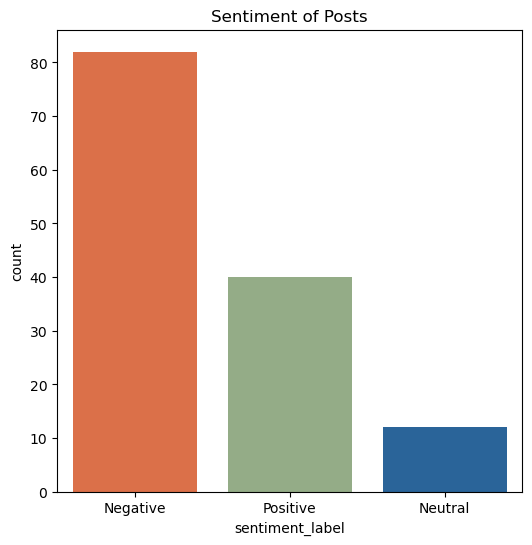

In [103]:
# Sentiment of Posts
custom_colors_posts = {
    'Positive': "#92b281",   
    'Negative': "#f46530",  
    'Neutral': "#1865ab"  
}

plt.figure(figsize=(6, 6))
sns.countplot(x='sentiment_label', data=df_posts, palette=custom_colors_posts)
plt.title('Sentiment of Posts')
plt.show()

In [25]:
# percent of total for each sentiment label
percent_post_sentiment = (post_sentiment/post_sentiment.sum())*100
display(percent_post_sentiment)

sentiment_label
Negative    61.194030
Positive    29.850746
Neutral      8.955224
Name: count, dtype: float64

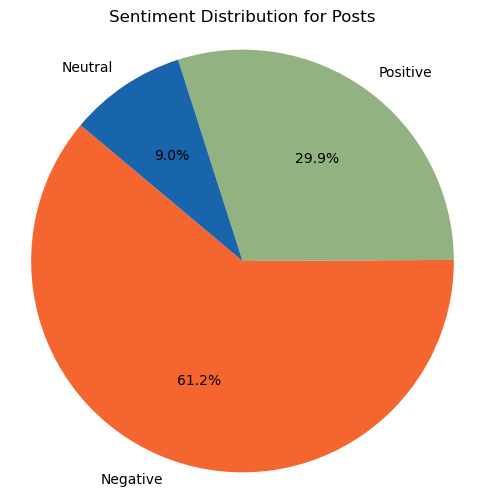

In [53]:
# Sentiment Distribution for Posts
custom_colors_posts = {
    'Positive': "#92b281",   
    'Negative': "#f46530",  
    'Neutral': "#1865ab"  
}
colors = [custom_colors_posts.get(sentiment, '#cccccc') for sentiment in percent_post_sentiment.index]

plt.figure(figsize=(6, 6))
plt.pie(percent_post_sentiment, 
        labels=percent_post_sentiment.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors
       )
plt.title('Sentiment Distribution for Posts')
plt.axis('equal')
plt.show()

In [11]:
# post with the highest sentiment 
highest_sentiment_post = df_posts.sort_values(by='sentiment', ascending=False)[['title','subreddit', 'sentiment', 'num_comments', 'date']].head(10)
display(highest_sentiment_post)

,title,subreddit,sentiment,num_comments,date
109,Konfidential KUWTK Producer Secrets - Season 1...,KUWTK,0.9997,23,2020-05-01 01:11:04
106,Fran Hart's Fabulous Frocks and Happy Haberdas...,hercreation,0.9978,10,2020-07-05 15:41:43
49,Upcoming Supreme Court cases that could change...,Keep_Track,0.9932,133,2022-09-07 13:58:54
105,Second Chance: Heroes vs Villains,survivor,0.9352,13,2020-07-05 20:05:53
130,Please Check Out You Stream I Stream's Latest ...,AdvertiseYourVideos,0.9199,1,2019-11-22 23:36:55
132,Please Check Out You Stream I Stream's Latest ...,SmallYTChannels,0.9199,1,2019-11-22 23:03:14
131,Please Check Out You Stream I Stream's Latest ...,SmallYoutubers,0.9199,1,2019-11-22 23:14:11
34,"In Reed v Goertz, the Supreme Court revives ca...",scotus,0.9068,28,2023-04-19 14:14:17
133,You Stream I Stream's Latest Stream,youtubestartups,0.9018,1,2019-11-22 22:52:50
98,"Crime in Bastrop, TX that's not the Rodney Ree...",TrueCrimePodcasts,0.8720,10,2021-03-13 15:54:37


In [10]:
# post with the lowest sentiment 
lowest_sentiment_post = df_posts.sort_values(by='sentiment', ascending=True)[['title','subreddit', 'sentiment', 'num_comments', 'date']].head(5)
display(lowest_sentiment_post)

,title,subreddit,sentiment,num_comments,date
123,List of True Crime Podcasts - one case per pod...,TrueCrimePodcasts,-1.0000,161,2019-11-27 10:37:14
102,Kim Kardashian and other celebs believe Rodney...,UnresolvedMysteries,-0.9999,228,2020-12-09 19:58:37
59,"She is scheduled to be executed April 27, 2022",FalseConfessions,-0.9997,2,2022-02-07 04:23:30
104,How true crime documentaries lie to you: Rodne...,TrueCrimeDiscussion,-0.9989,2,2020-07-12 11:11:28
107,True crime documentaries lying to the audience...,StevenAveryIsGuilty,-0.9970,15,2020-05-25 09:32:02


Comment Sentiment

In [81]:
# average sentiment for comments
avg_comment_sentiment = df_comments['sentiment'].mean()
print(f'Average Comment Sentiment: {avg_comment_sentiment}')

Average Comment Sentiment: -0.21816584673604542


In [26]:
# number of each sentiment labels for comments
comment_sentiment = df_comments['sentiment_label'].value_counts()
display(post_sentiment)

sentiment_label
Negative    82
Positive    40
Neutral     12
Name: count, dtype: int64

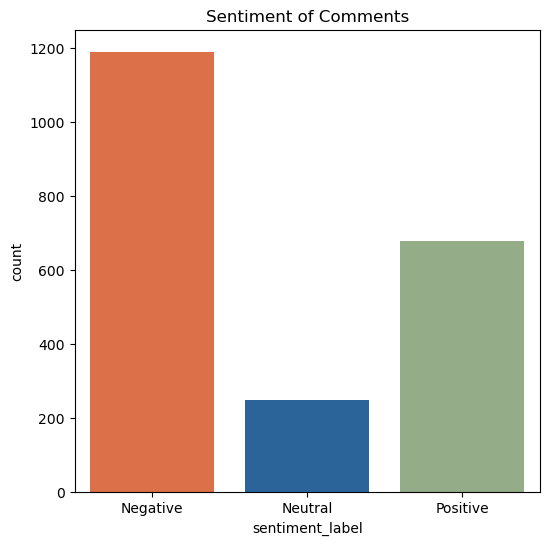

In [104]:
# Sentiment of Comments
custom_colors_comments = {
    'Positive': "#92b281",   
    'Negative': "#f46530",  
    'Neutral': "#1865ab"  
}

plt.figure(figsize=(6, 6))
sns.countplot(x='sentiment_label', data=df_comments, palette=custom_colors_comments)
plt.title('Sentiment of Comments')
plt.show()

In [27]:
# percent of total for each sentiment labels
percent_comment_sentiment = (comment_sentiment/comment_sentiment.sum())*100
display(percent_comment_sentiment)

sentiment_label
Negative    56.244087
Positive    32.024598
Neutral     11.731315
Name: count, dtype: float64

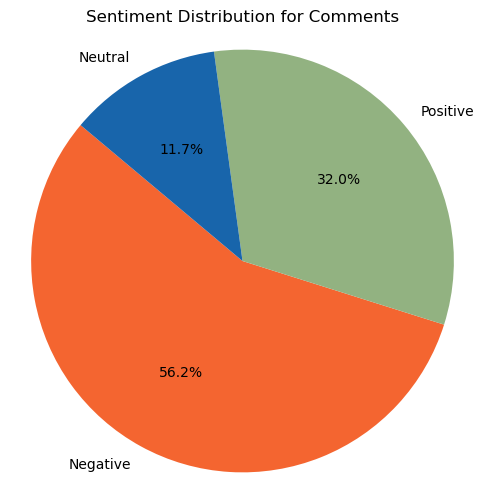

In [52]:
# Sentiment Distribution for Comments
custom_colors_comments = {
    'Positive': "#92b281",   
    'Negative': "#f46530",  
    'Neutral': "#1865ab"  
}
colors = [custom_colors_comments.get(sentiment, '#cccccc') for sentiment in percent_comment_sentiment.index]

plt.figure(figsize=(6, 6))
plt.pie(percent_comment_sentiment, 
        labels=percent_comment_sentiment.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors
       )
plt.title('Sentiment Distribution for Comments')
plt.axis('equal')
plt.show()

In [38]:
# comments with the highest sentiment 
highest_sentiment_comment = df_comments.sort_values(by='sentiment', ascending=False)[['body', 'sentiment', 'score']].head(5)
display(highest_sentiment_comment)

,body,sentiment,score
1428,"I'm sorry, but although I agree OJ was guilty, Chauvin's trial was as fair as anyone elses. I watched alot of it and listened while at work and he was not slighted in his defense. He may have been convicted in the public eye before the trial began, but that was because the video evidence was pretty hard to overcome. How can he explain away his actions from that day? There is no logical reason to manhandle someone that way who is not putting up a fight, and is begging to be allowed to breathe.\n\nI look at it like this. A person in a position of power, whether a cop, president, or preacher, has a higher level of scrutiny and must live up to their position. No one is perfect, but if you choose to be a preacher, then you have to try your best to live as God has instructed and when you slip, repent and ask forgiveness. If you are president, then you ""should"" act with integrity and as a leader for your people.\n\nWhen a cop is tasked with keeping people safe and enforcing the laws we have created for society, it is extremely important for them to be the example for those who may choose the unlawful path. Sometimes they are in situations that are life threatening, and are (or should be trained) to react in the amount of force necessary to end the conflict. \n\nBut in today's advancement of technology, everything a person does can be caught under the public microscope. Literally EVERYONE knows this ahead of time. We know we are being watched from all angles, and should act accordingly. It should be even more important for those who hold a higher position in our society than the lay folks. So no, Derek Chauvin did not get mistreated in his trial. He was represented by an attorney who used the law to his best ability to defend him, and he was convicted by a jury of peers. He acted in a way that no peace officer should act. If his actions, which we actually have full evidence of, are allowed to be swept away under the rug because he is a cop, then what can we expect from those who care nothing of the laws that shape our society?",0.9929,34
990,"It's very hard to follow what you're saying at times, because of your aversion to periods, so I apologogize if I skip over something you consider to be important, of if I misinterprent something. English is not my native language.\n\nMy prediction is based on the most recent hearing; in which the judge reckommended Reed should not get a new trial, based on the above reasons among others. As I've already said; the supreme court is looking over a procedural issue with regards to stature of limitations on DNA testing. Not the actual merits of the case. The Texas court of criminal appeals, is to my knowledge still looking the case over, and has a chance to ignore the recent reckomendation by judge Langley. They're proably a better bet for you than SCOTUS.\n\nIm's sorry, but your argument that you've looked over the case for 20 years, is less impressive, when you all but admitted that some of evidence of his guilt that I presented to you, was new information to you. I've been researching and keeping up with the case for 5 years and while there's certainly are limits to my knowledge, it's not as comprehensively lacking as you seem to be infering, simply because I'm not from Bastrop. Almost everything on Reed's case, including trial transcripts and the lastest depostion by the defence are readily availible on the internet, so even if I havn't been to the courtroom, I have a pretty good idea exactly was was said in said courtroom. I'm curious: What do you have access to that I have not, over the internet? And more importantly, is that evidence something worth considering, if Reed's lwayers doesn't even seem to think so? Wouldn't they have in interest in presenting it to the public?\n\nI admire your optimism, but there's less than 0% chance of Reed walking free within 4 months. Unless you're talking about 2023, in which case there would at least be the smallest of chances, de

In [39]:
# comments with the lowest sentiment 
lowest_sentiment_comment = df_comments.sort_values(by='sentiment', ascending=True)[['body', 'sentiment', 'score']].head(5)
display(lowest_sentiment_comment)

body  \
1920  Thank you very much for this and all the work you put in it, it is very useful for me and I'm sure for many others.\n\nI espacially like the one case per podcast stories and here is my contribution to your list with some podcasts I don't see to much on this sub. I don't know if your goal is to do an exhaustive list but I hope some of the podcasts below can help you. Be aware that I didn't listen to all of these podcasts but they are all in my wishlist.\n\nSorry if there is any double mention.\n\nHANGING : a sheriff's deputy. His 10-year-old son. A bitter custody battle. A haunting death. Was it suicide? Or something more sinister? Twenty-five years later, authorities decided to take a closer look. So did Mercury News reporter Julia Prodis Sulek.\n\n\n13 THE SEARCH FOR LEIGH OCCHI : return to the scene where thirteen year-old Leigh Occhi went missing, leaving behind only a bloodied nightgown.\n\n\nTHREE MEN AND A MYSTERY : the unsolved 1999 Alabama murders of J.B. Beasley & Tracie Hawlett.\n\n\n5 ROSES : Newlywed bride Mary Shotwell Little vanished from Lenox Square in 1965. A year and a half later, Diane Shields was found brutally murdered in her own car’s trunk.  Atlanta would never be the same.\n\n\nA MURDER ON ORCHARD STREET : An ex-NYC detective returns to the scene of an unsolved homicide, reuniting with the victim's sister and reaching out for help from the reporter who filmed the case moment-to-moment in 2003, in one last attempt to solve the crime and bring the murderers to justice.\n\n\nAMBUSHED : Lorraine McNab and Peter Sopow are gunned down outside Lorraine’s home near Pincher Creek, Alberta. Their bodies are found 36 hours later. Lorraine's family speaks for the first time about what happened that day.\n\n\nBLOOD AND TRUTH : Tommy Zeigler has been on death row for 42 years and for more than half that time, he’s been trying to convince the state of Florida to allow for DNA tests that might help exonerate him. But the state continually refuses. About 20 other men are in a similar situation, imprisoned in Florida since the 1970s or ’80s and arguing that it’s inherently unfair to deny them access to 21st century science.\n\n\nBODY ON THE MOOR : Last December a man's body was discovered in the desolate landscape of Saddleworth Moor in the Peak District National Park.\n\n\nBREAK IN THE CASE (NYPD Podcast) : A gruesome discovery by a road crew in Washington Heights sends the 34th Precinct Detective Squad on a hunt for a little girl's identity.\n\n\nCASE CLOSED : two seasons\n\n\nCHILLINGWORTH : Chillingworth recounts the lurid saga of the men behind the most notorious crime in Florida’s history: the grisly 1955 murder of a brilliant judge revered as an icon of integrity.\n\n\nCHRISTINA GRIMMI, a Murder of a Rising Star : murder of Christina Grimmie in Orlando, FL shocked the world. The 22-year-old singer was gaining fans after coming in 3rd place on NBC's 'The Voice' competition show.\n\n\nCOVER-UP : A presidential hopeful crashes his car in the middle of the night and leaves a young woman to die. What transpired in the hours after Ted Kennedy’s car went over the bridge in Chappaquiddick changed the course of American history.\n\n\nDEAD WRONG : Jeffrey Brooks feared for his life. He believed he was going to be murdered at his workplace - and that those involved would try and make it look like an accident. Not long after, Jeffrey was dead.\n\n\nFROZEN LIES : What begins with a body in a kitchen freezer leads Debi Marshall to a sordid tale of seduction and lies, from Adelaide, to the Outback to the Adriatic Coast\n\n\nDIRTY RATS : Dirty Rats is the true story of two of Boston's most powerful brothers - one a gangster, the other a politician - as they rose from poverty in a public-housing project to the pinnacles of power in their respective trades.\n\n\nEMPIRE OF BLOOD : In the Bronx, in the early 90s, two young drug dealers ruled an intersection known as “The Corner on Blood.” They lived large, wearing mink,

Sentiment by Subreddit

In [83]:
# highest average sentiment by subreddit
subreddit_sentiment = df_posts.groupby('subreddit')['sentiment'].mean()
subreddit_sentiment = subreddit_sentiment.sort_values(ascending=False)

display(subreddit_sentiment.head(15))

subreddit
hercreation             0.99780
Keep_Track              0.99320
survivor                0.93520
SmallYoutubers          0.91990
SmallYTChannels         0.91990
AdvertiseYourVideos     0.91990
youtubestartups         0.90180
EndMassIncarceration    0.86020
CriminallyObsessed      0.59040
StateoftheUnionNONF     0.55740
u_teresa472002          0.54230
NoStupidQuestions       0.52830
Positive_News           0.52670
HOUSTONCHRONauto        0.52665
TexasPolitics           0.47000
Name: sentiment, dtype: float64

In [84]:
# lowest average sentiment by subreddit
subreddit_sentiment = df_posts.groupby('subreddit')['sentiment'].mean()
subreddit_sentiment = subreddit_sentiment.sort_values(ascending=True)

display(subreddit_sentiment.head(15))

subreddit
FalseConfessions      -0.99970
UnresolvedMysteries   -0.99765
StevenAveryIsGuilty   -0.99700
supremecourt          -0.95490
TrueCrime             -0.91790
AccusedGoI            -0.84930
CrimePlus             -0.80200
NBCauto               -0.79640
creeptimethepodcast   -0.74870
howardstern           -0.66790
chomsky               -0.62290
TrueCrimeUpdates      -0.61240
TORONTOSTARauto       -0.57190
CoinBase              -0.56530
nytimes               -0.48200
Name: sentiment, dtype: float64

Sentiment Based on Racial Keywords

In [57]:
# potential racial keywords to test for sentiment
racial_keywords = [
    "black man",
    "african american",
    "white woman",
    "interracial",
    "racial bias",
    "racist",
    "systemic racism",
    "white privilege",
    "wrongfully convicted black men",
    "black lives matter",
    "blm",
    "race",
    "racial injustice"
]

In [68]:
# function to search for keywords and calculate sentiment
def search_racial_keywords(df, text_col, keywords):
    results = []

    for keyword in keywords:
        matched = df[df[text_col].str.contains(keyword, case=False, na=False)].copy()
        if not matched.empty:
            matched['keyword'] = keyword
            matched['sentiment'] = matched[text_col].apply(lambda x: sia.polarity_scores(x)['compound'])
            results.append(matched)

    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()  # empty if no matches

# Apply to posts and comments
racial_posts = search_racial_keywords(df_posts, 'text', racial_keywords)
racial_comments = search_racial_keywords(df_comments, 'text', racial_keywords)

In [112]:
# sentiment for posts with racial keywords
print(f'Racial Sentiment Average: {racial_posts["sentiment"].mean()} \nNumber of Posts with Racial Keywords: {racial_posts["sentiment"].count()} \nSentiment for Posts with Racial Keywords \n')
display(racial_posts[["keyword", "id", "sentiment", "date"]])

Racial Sentiment Average: -0.1643666666666667 
Number of Posts with Racial Keywords: 12 
Sentiment for Posts with Racial Keywords 



,keyword,id,sentiment,date
0,black man,x85ui4,0.9932,2022-09-07 13:58:54
1,black man,nre4vd,-0.9490,2021-06-03 13:57:28
2,black man,k9zbbe,-0.9999,2020-12-09 19:58:37
3,african american,hpsrwy,-0.9989,2020-07-12 11:11:28
4,african american,e2ebtg,-1.0000,2019-11-27 10:37:14
5,white woman,x85ui4,0.9932,2022-09-07 13:58:54
6,white woman,k9zbbe,-0.9999,2020-12-09 19:58:37
7,racist,hlong4,0.9978,2020-07-05 15:41:43
8,race,x85ui4,0.9932,2022-09-07 13:58:54
9,race,k9zbbe,-0.9999,2020-12-09 19:58:37


In [113]:
print(f'Racial Sentiment Average: {racial_comments["sentiment"].mean()} \nNumber of Comments with Racial Keywords: {racial_comments["sentiment"].count()} \nSentiment for Comments with Racial Keywords \n')
display(racial_comments[['keyword', 'comment_id', 'sentiment', 'date']])

Racial Sentiment Average: -0.6975244791666667 
Number of Comments with Racial Keywords: 192 
Sentiment for Comments with Racial Keywords 



,keyword,comment_id,sentiment,date
0,black man,ll9ltqd,-0.9831,2024-09-03 06:12:16
1,black man,lbe6ua2,-0.8555,2024-07-03 03:59:29
2,black man,lir38me,-0.9394,2024-08-18 18:16:45
3,black man,li9toiu,-0.9904,2024-08-15 17:37:23
4,black man,lixmmka,-0.9954,2024-08-19 20:47:32
...,...,...,...,...
187,race,faj5v0c,0.0000,2019-12-12 04:36:15
188,race,f8qqh13,0.9410,2019-11-25 22:44:55
189,race,f8daj1o,-0.9986,2019-11-23 04:30:28
190,race,f8sytp3,-0.9862,2019-11-26 18:14:52
